# Лабораторная работа № 3
## Вариант 24, Щеглова П.Н.
Массив данных с информацией о постояльцах некоторой гостиницы: ФИО, занимаемый номер, дата приезда, дата отъезда, сумма оплаты проживания (сравнение по ключевому полю – ФИО)

Сортировка наиболее эффективным методом из Лабораторной № 1 (из реализованных) - быстрая сортировка

In [65]:
"""@package docstring
In this module class and its methods are created.
"""

import numpy as np


class Guest:
    """class Guest consists of a name, room number, check-in and check-out dates in April 2020 
    and amount to pay of the guest in the hotel.
 
    There are methods to create, compare and represent the Guests.
    """
    def __init__(self, Name, room, check_in, check_out, amount, hash_func):
        """The constructor."""
        self.Name = Name
        self.room = room
        self.check_in = check_in
        self.check_out = check_out
        self.amount = amount
        self.hash = hash_func(Name)
        
    def __lt__(self, other): 
        """Comparing Guests by name. Operator <"""
        if self.Name < other.Name:
            return True
        return False
    def __gt__(self, other): 
        """Comparing Guests by name. Operator <"""
        if self.Name > other.Name:
            return True
        return False
    def __le__(self, other): 
        """Comparing Guests by name. Operator <="""
        if self.Name <= other.Name:
            return True
        return False
    def __ge__(self, other): 
        """Comparing Guests by name. Operator >="""
        if self.Name >= other.Name:
            return True
        return False
    def __eq__(self, other): 
        """Comparing Guests by name. Operator =="""
        if self.Name == other.Name:
            return True
        return False
                    
    def __repr__(self):
        """The representer."""
        return "Guest {i} stays in room #{j} from {k} to {l} April\n".format(i=self.Name,
                                                                            j=self.room,
                                                                            k=self.check_in,
                                                                            l=self.check_out)

In [61]:
"""@package docstring
In this module two classes and its methods are created.
"""
class Node:
    def __init__(self, value = None, next_node = None):
        """The constructor."""
        self.value = value
        self.next = next_node
        
class LinkedList:
    """List of Nodes."""
    def __init__(self, x = None):
        """The constructor."""
        if x != None:
            self.first = Node (x, None)
            self.last = Node(x, None)
            self.length = 1
        else:
            self.first =None
            self.last = None
            self.length = 0
            
    def __str__(self):
        """String representation."""
        if self.first != None:
            current = self.first
            out = 'LinkedList [\n' + str(current.value) + '\n'
            while current.next != None:
                current = current.next
                out += str(current.value) + '\n'
            return out + ']'
        return 'LinkedList []'
    
    def clear(self):
        self.__init__()
        
    def add(self, x):
        """The mutator - add value in the end of the list."""
        self.length += 1
        if self.first == None:
            self.last = self.first = Node (x, None)
        else:
            self.last.next = Node (x, None)
            self.last = Node (x, None)
            
    def push(self, x):
        """The mutator - add value in the beginning of the list."""
        self.length += 1
        if self.first == None:
            self.last = self.first = Node (x, None)
        else:
            self.first = Node (x, self.first)
            
    def insert_n(self, n, x):
        """The mutator - add value in certain position of the list."""
        if self.first == None:
            self.last = self.first = Node (x, None)
            return
        if i == 0:
            self.first = Node (x, self.first)
            return
        current = self.first
        count = 0
        while current != None:
            count += 1
            if count == i:
                current.next = Node(x, current.next)
                if current.next.next == None:
                    self.last = current.next
                break
            current = current.next

In [62]:
"""@package docstring
In this module simple searching algorithm is defined.
"""
p_const = 59
# сначала вычислим все нужные степени p_const, начиная с первой, и сохраним в массив
Powers = [p_const]
for i in range(40):
    Powers.append(Powers[-1]*p_const)

def simple_hash(key_str):
    h = 0
    for i in range(len(key_str)):
        h += (ord(key_str[i]) - ord('а') +1)*Powers[i]
    return h

In [67]:
"""@package docstring
In this module more complex searching algorithm is defined - RS.
"""
def RSHash(key_str):
    b = 378551
    a = 63689
    h = 0
    for i in range(len(key_str)):
        h = h * a + ord(key_str[i])
        a = a * b
    return h


In [69]:
"""@package docstring
In this module data is imported from txt-files and saved in series of class Guest.
"""
import pandas as pd

lists = ['list {a}.txt'.format(a=num) for num in range(1,11)]
inputs = [pd.read_csv(a, header = None, sep='\t') for a in lists]


def to_Guest (df_list, hash_func):
    """Function provides the conversion from pandas.DataFrame dtype=string to pandas.Series dtype=object.Guest."""
    list_guest = pd.Series(np.empty((len(df_list))))
    for i in range(len(df_list)):
        Name = df_list[0][i]
        room = int(df_list[1][i])
        check_in = int(df_list[2][i])
        check_out = int(df_list[3][i])
        amount = int(df_list[4][i])
        list_guest.iloc[[i]] = Guest(Name, room, check_in, check_out, amount, hash_func)
    return list_guest


In [150]:
"""@package docstring
In this module data is saved in a list of linked lists (hash table) by hash indexation <key, object=Guest>.
"""
def hash_table(list_guest):
    """
* @list_guest - массив объектов класса Guest.
* @collisions - переменная для хранения числа коллизий.
* @hash_table - хэш-таблица на основе хэшей и соответствующих индексов массива объектов.
* @list_guest[i].hash - i-тый хэш, могут повторяться.
* @hash_i - индекс для хэша в хэш-таблице.
    """
    collisions = 0
    hash_table = [ LinkedList() for i in range(len(list_guest))]
    for i in range(len(list_guest)):
        hash_i = (list_guest[i].hash)%(len(hash_table))
        while hash_table[hash_i].length != 0 and hash_table[hash_i].last.value[0] != list_guest[i].hash:
            """Случай, если по заданному ключу уже помещен объект и его хэш не совпадает с хэшем вставляемого объекта."""
            hash_i = (hash_i + 1)%(len(list_guest))
        """Ищем в выбранном связном списке совпадение ключевого поля ФИО."""
        found = True
        current = hash_table[hash_i].first
        for i in range(hash_table[hash_i].length):
            found = False
            if not(current.value[1] == list_guest[i]):
                found = True
                break
            current = current.next
        if not(found):
            collisions += 1
        (hash_table[hash_i]).add((list_guest[i].hash,list_guest[i]))
    return hash_table, collisions


In [71]:
"""@package docstring
In this module data is saved in a dictionary<key, object=Guest>.
"""
def to_dict(list_guest):
    """
* @list_guest - массив объектов класса Guest.
* @list_dict - словарь, в который переписывается входящий массив.
* @list_guest[i].Name - i-тое ФИО, могут повторяться, ключ словаря.
    """
    list_dict = dict()
    for i in range(len(list_guest)):
        if list_guest[i].Name in list_dict:
            """Случай, если по заданному ключу уже помещен объект."""
            (list_dict[list_guest[i].Name]).append(list_guest[i])
        else:
            list_dict[list_guest[i].Name] = [list_guest[i]]
    return list_dict

In [72]:
"""@package docstring
In this module quick sorting algorithm is formed as a functional module. Const function.
Input-lists are sorted by Name.
"""
import random

def quicksort(nums):
    if len(nums) <= 1:
        return nums
    else:
        q = random.choice(nums)
        s_nums = []
        b_nums = []
        e_nums = []
        for n in nums:
            if n < q:
                s_nums.append(n)
            elif n > q:
                b_nums.append(n)
            else:
                e_nums.append(n)
        return quicksort(s_nums) + e_nums + quicksort(b_nums)

In [79]:
"""@package docstring
In this module linear searching algorithm is formed as a functional module. Const function.


* Функция линейного поиска элемента в массиве по заданному ключу.
* @data - массив, в котором производится поиск. Необязательно отсортированный.
* @key - строка, используемая как ключ для поиска элемента.
* @return массив индексов, по которым располагается найденный элемент.
* @return -1 в случае, если элемент не найден.
"""

def l_search(data, key):
    key=Guest(key,0,0,0,0,simple_hash)
    Indexes = []
    for i in range(len(data)):
        if data[i] == key:
            Indexes.append(i)
    if len(Indexes) > 0:
        return Indexes
    return -1

In [80]:
"""@package docstring
In this module binary searching algorithm is formed as a functional module. Const function.

* Функция бинарного поиска элемента в отсортированном массиве по заданному ключу.
* @data - отсортированный массив, в котором производится поиск
* @Key - строка, используемая как ключ для поиска элемента.
* @left - левая граница области поиска.
* @right - правая граница области поиска.
* @return массив индексов, по которым располагается найденный элемент.
* @return -1 в случае, если элемент не найден.
"""

def b_search(data, Key):
    Key=Guest(Key,0,0,0,0,simple_hash)
    mid = len(data) // 2
    left = 0
    right = len(data) - 1
    while not(data[mid] == Key) and left <= right:
        if Key > data[mid]:
            left = mid + 1
        else:
            right = mid - 1
        mid = (left + right) // 2
    if left > right:
        return -1
    else:
        Indexes = [mid]
        i = mid-1
        while i>0 and data[i]==Key:
            Indexes.append(i)
            i -= 1
        i = mid+1
        while i<len(data) and data[i]==Key:
            Indexes.append(i)
            i+=1
        return Indexes

In [127]:
"""@package docstring
In this module searching using hash-table is formed as a functional module. Const function. Hash function is used.
"""
def l_search_by_key(hash_tab, key, hash_func):
    """
* @hash_tab - хэш-таблица на основе хэшей и соответствующих индексов массива объектов.
* @key -ключ-ФИО.
* @hash_func - используемая функция хэширования ключевого поля.
    """
    index = hash_func(key)%(len(hash_tab))
    current = hash_tab[index].first
    guests = []
    while len(guests) == 0:
        while True:
            if current.value[0] == hash_func(key):
                guests.append(current.value[1])
            current = current.next
            if current == None:
                break
        index = (index + 1)%(len(hash_tab))
        current = hash_tab[index].first
    return guests

In [125]:
"""@package docstring
In this module searching using hash-table is formed as a functional module. Const function. Hash function is not used.
"""
def l_search_by_hash(hash_tab, hash_value):
    """
* @hash_tab - хэш-таблица на основе хэшей и соответствующих объектов массива.
* @hash_value - хэш ключевого поля.
    """
    index = hash_value%(len(hash_tab))
    current = hash_tab[index].first
    
    guests = []
    while len(guests) == 0:
        while True:
            if current.value[0] == hash_value:
                guests.append(current.value[1])
            current = current.next
            if current == None:
                break
        index = (index + 1)%(len(hash_tab))
        current = hash_tab[index].first
    return guests

In [82]:
"""@package docstring
In this module all algorithms are timed on the inputs.
"""
import timeit
import time

def searchsort_time(data, key, search_alg):
    """
* @data - массив, в котором производится поиск. Необязательно отсортированный.
* @key - строка, используемая как ключ для поиска элемента.
* @search_alg - алгоритм поиска.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        search_alg(quicksort(data), key)
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

def search_hash_time(data, key, search_alg, hash_func):
    """
* @data - хэш-таблица, в которой производится поиск.
* @key - строка, используемая как ключ для поиска элемента.
* @search_alg - алгоритм поиска.
* @hash_func - используемая функция хэширования ключевого поля.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        search_alg(data, key, hash_func)
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

def search_time(data_sorted, key, search_alg):
    """
* @data_sorted - массив, в котором производится поиск. Отсортированный.
* @key - строка, используемая как ключ для поиска элемента.
* @search_alg - алгоритм поиска.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        search_alg(data_sorted, key)
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

def dict_search_time(data_dict, key):
    """
* @data_dict - массив, в котором производится поиск. Ассоциативный.
* @key - строка, используемая как ключ для поиска элемента.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        data_dict.get(key)
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

inputs_g_simple = [to_Guest(inputs[i], simple_hash) for i in range(len(inputs))]
inputs_g_RS = [to_Guest(inputs[i], RSHash) for i in range(len(inputs))]
inputs_sorted = list(map(quicksort, inputs_g_simple))
inputs_dict = list(map(to_dict, inputs_g_simple))
keys = ['Бавыкина Марина Павловна', 'Нугманов Артур Маратович', 'Кочинян Карлен Норикович', 'Слабуха Мария Константиновна',
       'Седых Иван Дмитриевич', 'Хромушкин Александр Алексеевич', 'Мазур Дарья Александровна', 'Антонина Раужева',
       'Женя Сибилькова', 'Сайрам Алешичев']
    

In [143]:
binarsort_time = []
binar_time = []
linear_time = []
dict_time = []

for i in range(len(keys)):
    linear_time.append(search_time(inputs_g_simple[i], keys[i], l_search))
    binar_time.append(search_time(inputs_sorted[i], keys[i], b_search))
    binarsort_time.append(searchsort_time(inputs_g_simple[i], keys[i], b_search))
    dict_time.append(dict_search_time(inputs_dict[i], keys[i]))

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: DeprecationWarning: time.clock has been dep

In [151]:
RShash_time_by_key = []
RShash_time_by_hash = []
simple_time_by_key = []
simple_time_by_hash = []
collisions_RS = [0 for a in range(10)]
collisions_simple = [0 for a in range(10)]

for i in range(len(keys)):    
    hash_tab_RS, collisions_RS[i] = hash_table(inputs_g_RS[i])
    hash_tab_simple, collisions_simple[i] = hash_table(inputs_g_simple[i])
    
    RShash_time_by_key.append(search_hash_time(hash_tab_RS, keys[i], l_search_by_key, RSHash))
    RShash_time_by_hash.append(search_time(hash_tab_RS, RSHash(keys[i]), l_search_by_hash))
    simple_time_by_key.append(search_hash_time( hash_tab_simple, keys[i], l_search_by_key, simple_hash))
    simple_time_by_hash.append(search_time( hash_tab_simple, simple_hash(keys[i]), l_search_by_hash))

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


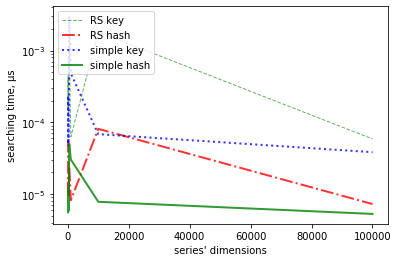

In [152]:
"""@package docstring
In this module graph is created to visualy compare the speed difference between searching algorithms. Log scale.
"""
import matplotlib.pyplot as plt
dims = list(map(len, [list3_guest,list1_guest, list2_guest, list4_guest, list5_guest, list6_guest, list7_guest , list8_guest, list9_guest, list10_guest]))
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

plt.plot(dims, RShash_time_by_key, '--g', lw=1, alpha=0.6, label='RS key')
plt.plot(dims, RShash_time_by_hash, '-.r', lw=2, alpha=0.8, label='RS hash')
plt.plot(dims, simple_time_by_key, ':b', lw=2, alpha=0.8, label='simple key')
plt.plot(dims, simple_time_by_hash, 'g', lw=2, alpha=0.8, label='simple hash')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('series\' dimensions')
plt.ylabel('searching time, µs')
ax.set_yscale('log')
plt.show()

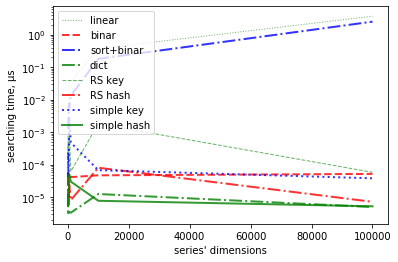

In [153]:
"""@package docstring
In this module graph is created to visualy compare the speed difference between searching algorithms. Log scale.
"""
import matplotlib.pyplot as plt
dims = list(map(len, [list3_guest,list1_guest, list2_guest, list4_guest, list5_guest, list6_guest, list7_guest , list8_guest, list9_guest, list10_guest]))
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

plt.plot(dims, linear_time, ':g', lw=1, alpha=0.6, label='linear')
plt.plot(dims, binar_time, '--r', lw=2, alpha=0.8, label='binar')
plt.plot(dims, binarsort_time, '-.b', lw=2, alpha=0.8, label='sort+binar')
plt.plot(dims, dict_time, '-.g', lw=2, alpha=0.8, label='dict')
plt.plot(dims, RShash_time_by_key, '--g', lw=1, alpha=0.6, label='RS key')
plt.plot(dims, RShash_time_by_hash, '-.r', lw=2, alpha=0.8, label='RS hash')
plt.plot(dims, simple_time_by_key, ':b', lw=2, alpha=0.8, label='simple key')
plt.plot(dims, simple_time_by_hash, 'g', lw=2, alpha=0.8, label='simple hash')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('series\' dimensions')
plt.ylabel('searching time, µs')
ax.set_yscale('log')
plt.show()

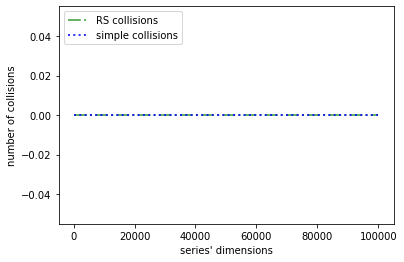

In [154]:
"""@package docstring
In this module graph is created to visualy compare the collision difference between hash functions. Log scale.
"""
import matplotlib.pyplot as plt
dims = list(map(len, [list3_guest,list1_guest, list2_guest, list4_guest, list5_guest, list6_guest, list7_guest , list8_guest, list9_guest, list10_guest]))
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

plt.plot(dims, collisions_RS, '-.g', lw=2, alpha=0.6, label='RS collisions')
plt.plot(dims, collisions_simple, ':b', lw=2, alpha=0.8, label='simple collisions')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('series\' dimensions')
plt.ylabel('number of collisions')
plt.show()

In [126]:
l_search_by_hash(hash_table(inputs_g_simple[5]), 15703020516107383520309989486465746758856309433381)

[Guest Парамонов Виктор Алексеевич stays in room #133 from 29 to 28 April]

In [128]:
l_search_by_key(hash_table(inputs_g_simple[5]), 'Селиванов Илья Александрович', simple_hash)

[Guest Селиванов Илья Александрович stays in room #137 from 18 to 17 April]

In [155]:
for linkedlist in hash_table(inputs_g_simple[9]):
    if linkedlist.lenght>1:
        print(linkedlist)

AttributeError: 'list' object has no attribute 'lenght'